# 0. Preliminaries

In [59]:
from __future__ import division
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from IPython.display import  Image
np.random.seed(1234)

# Problem Set 1
## Author: *HOON KIM (SID:22730946)*
## Projections
### 1. Let $X$ and $Y$ be two mean zero random variables with finite variance. (i.e. $E[X] = 0$, $E[Y] = 0$, $E[X^2]<\infty$, and $E[Y^2]<\infty$). Let the population correction be
$$\begin{equation}
\rho = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}.
\end{equation}$$
### Use the *Cauchy-Schwarz Inequality* to prove $0\leq\rho^2\leq1$.

*__Cauchy-Schwarz Inequality__* states that

$$\mid<\textbf{u},\textbf{v}>\mid~\leq~<\textbf{u},\textbf{u}>\cdot<\textbf{v},\textbf{v}>$$
$$\Leftrightarrow~ \mid<\textbf{u},\textbf{v}>\mid~ \leq~ \lVert\textbf{u}\rVert\cdot\lVert\textbf{v}\rVert$$.
$$\Leftrightarrow~ \mid\sum_{i=1}^n u_{i}\overline{v_{i}}\mid^2~ \leq~ \sum_{j=1}^n |u_{j}|^2 \cdot \sum_{k=1}^n |v_{k}|^2.$$

Since $E[X] = \frac{1}{n} \sum_{i=1}^n x_{i} ~\Leftrightarrow~ nE[X] = \sum_{i=1}^n x_{i}$, we can use both properties to derive an equation as such:

$$nE[AB]^2~ \leq~ nE[A^2] \cdot nE[B^2].$$

If we plug in $X-E[X] = A$, and $Y-E[Y] = B$,

$$nE[(X-E[X])(Y-E[Y])]^2~ \leq~ nE[(X-E[X])^2] \cdot nE[(Y-E[Y])^2]$$
$$\Leftrightarrow~ E[(X-E[X])(Y-E[Y])]^2~ \leq~ E[(X-E[X])^2] \cdot E[(Y-E[Y])^2].$$

Here, we can recollect from the lecture that

$$Cov(X,Y) = E[(X-E[X])(Y-E[Y])],$$
$$Var(X) = E[(X-E[X])^2],$$
$$Var(Y) = E[(Y-E[Y])^2].$$

If we plug in the above to the derived inequality,

$$(Cov(X,Y))^2 ~\leq~ Var(X) \cdot Var(Y)$$
$$\Leftrightarrow~ \frac{(Cov(X,Y))^2}{Var(X)Var(Y)} ~\leq~ 1,$$
$$\Leftrightarrow~ 0 \leq \rho^2 \leq 1. ~(~ \because~ (Cov(X,Y))^2, Var(X), Var(Y) ~\geq~ 0 ~).\blacksquare$$

### 2. Prove Pythagorean Theorem.

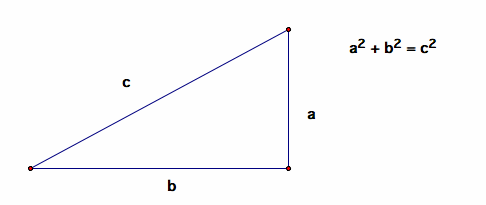

In [2]:
Image(filename='pythagorean.png')

Consider vectors $\textbf{a}$ and $\textbf{b}$, which are orthogonal to each other in an $\mathbb{R}^2$ space. Then we can prove the **Pythagorean Theorem** by using inner product properties.

$$\lVert \textbf{a}+\textbf{b} \rVert^2 = <\textbf{a}+\textbf{b},\textbf{a}+\textbf{b}> = \lVert \textbf{a} \rVert^2 + \lVert \textbf{b} \rVert^2 + <\textbf{a}, \textbf{b}> + \overline{<\textbf{b},\textbf{a}>} = \lVert \textbf{a} \rVert^2 + \lVert \textbf{b} \rVert^2 + 2\lVert \textbf{a} \rVert \lVert \textbf{b} \rVert \cdot cos\theta$$

Since $\textbf{a}$ and $\textbf{b}$ are orthogonal to each other, it is easy to observe that $<\textbf{a}, \textbf{b}>, \overline{<\textbf{b},\textbf{a}>} = 0$. Therefore, we can conclude that 

$$\lVert \textbf{a}+\textbf{b} \rVert^2 = \lVert \textbf{a} \rVert^2 + \lVert \textbf{b} \rVert^2$$

holds, which proves the **Pythagorean Theorem**. $\blacksquare$

## Production / cost function : Theory

Consider a population of firms. A firm with capital $k$ and labor $l$ produces output

$$y(k,l;A) = Ak^{\alpha}l^{\beta}.~ ~ ~ ~ ~ ~ ~ ~ (1)$$

Here A is firm-specific, capturing heterogeneity in the efficiency with which different firms are able to transform capital and labor into output. Let W denote the wage rate, and R the rental price of a unit of capital, faced by the firm. We assume that a firm seeking to produce output y, while facing input prices r and w, does so in a cost-minimizing way; choosing $K(y, r, w; A)$ and $L (y, r, w; A)$ to solve the constrained minimization problem

$$\min\limits_{k,l} rk + wl + \lambda [y - Ak^{\alpha}l^{\beta}].~ ~ ~ ~ ~ ~ ~ ~ (2)$$

**1)** The derived demand for capital and labor equals the amount of each input a firm would choose when seeking to produce $y$ while facing input prices $r$ and $w$. Show these derived demand schedules, under (2), equal:

$$K(y, r, w; A) = \alpha (\frac{y}{A})^{\frac{1}{\eta}} (\frac{w}{r})^{\frac{\beta}{\eta}} [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}} ~ ~ ~ ~ ~ ~ ~ ~ (3)$$

$$L (y, r, w; A) = \beta (\frac{y}{A})^{\frac{1}{\eta}} (\frac{w}{r})^{\frac{\alpha}{\eta}} [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}}, ~ ~ ~ ~ ~ ~ ~ ~ (4)$$

where $\eta = \alpha + \beta$. Briefly interpret the two demand schedules [5 to 10 sentences]. Why is $\eta$ called the returns-to-scale parameter?

**ANSWER**: In order to attain the optimal level of inputs ($K^{*}(y, r, w; A)$ and $L^{*}(y, r, w; A)$), we need approach with *Lagrangian*.

$$\mathcal{L} = rk + wl + \lambda[y - Ak^{\alpha}l^{\beta}].$$

F.O.C:

$$\frac{\partial\mathcal{L}}{\partial k} = r - \lambda \alpha A k^{\alpha -1} l^{\beta} = 0~ ~ ~ ~ ~ ~ (a)$$
$$\frac{\partial\mathcal{L}}{\partial l} = w - \lambda \beta A k^{\alpha} l^{\beta-1} = 0~ ~ ~ ~ ~ ~ (b)$$
$$\frac{\partial\mathcal{L}}{\partial\lambda} = y - A k^{\alpha} l^{\beta} = 0~ ~ ~ ~ ~ ~ (c)$$

From $(a)$ and $(b)$, we can derive:

$$\frac{w}{r} = \frac{\beta k}{\alpha l}$$
$$k = l(\frac{\alpha w}{\beta r}),~~ l = k(\frac{\beta r}{\alpha w}).$$

If we plug in $k$ and $l$ into the $(c)$,

$$A k^{\alpha} (k(\frac{\beta r}{\alpha w}))^{\beta} = y ~ \Leftrightarrow~ A k^{\alpha+\beta} (\frac{\beta r}{\alpha w})^{\beta} = y,$$
$$\Rightarrow~ k^{*} = (\frac{y}{A})^{\frac{1}{\alpha+\beta}}(\frac{\alpha}{\beta} \frac{w}{r})^{\frac{\beta}{\alpha+\beta}}$$

$$A(l(\frac{\alpha w}{\beta r}))^{\alpha} l^{\beta} = y ~ \Leftrightarrow~ A l^{\alpha+\beta} (\frac{\alpha w}{\beta r})^{\alpha} = y,$$
$$\Rightarrow~ l^{*} = (\frac{y}{A})^{\frac{1}{\alpha+\beta}}(\frac{\alpha}{\beta} \frac{w}{r})^{-\frac{\alpha}{\alpha+\beta}}.$$

Since

$$\alpha \cdot \alpha^{-\frac{\alpha}{\alpha + \beta}} = \alpha^{\frac{\beta}{\alpha + \beta}},$$
$$(\frac{\alpha}{\beta})^{\frac{\beta}{\alpha + \beta}} = \alpha^{\frac{\beta}{\alpha + \beta}} \beta^{-\frac{\beta}{\alpha + \beta}} = \alpha \cdot [\alpha^{\alpha}\beta^{\beta}]^{-\frac{1}{\alpha + \beta}}$$

If we plug in $\eta = \alpha + \beta$ to the equation,

$$K^{*}(y, r, w; A)  = \alpha (\frac{y}{A})^{\frac{1}{\eta}} (\frac{w}{r})^{\frac{\beta}{\eta}} [\alpha^{\alpha}\beta^{\beta}]^{-\frac{1}{\eta}}.$$

By the same logic and operation,

$$L^{*}(y, r, w; A) = \beta (\frac{y}{A})^{\frac{1}{\eta}} (\frac{w}{r})^{\frac{\alpha}{\eta}} [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}}.\blacksquare$$

**Interpretation of the two demand schedules**:
1. $K(y,r,w;A)$ is a function of capital, which takes in product, price of capital and wage as its input, conditioned by firm heterogeneity in the efficiency.
2. $L(y,r,w;A)$ is a function of labor, which takes in product, price of capital and wage as its input, conditioned by firm heterogeneity in the efficiency.
3. All in all, both demand schedules are the components of the cost function, which decides how much it will cost using certain amount of capital and labor in production, and $K^{*}(y,r,w;A)$ and $L^{*}(y,r,w;A)$ are the optimal functions for capital and labor, which minimizes the cost function.

**Why is $\eta$ called the returns-to-scale parameter?:**

$\eta$ is called the returns-to-scale parameter because
1. $\eta > 1$, we have more increase in return expected than the amount increase in both capital and labor. In other words, $y(aK,aL) > a*y(K,L)$,
2. $\eta = 1$, we have constant increase in return expected as the amount increase in both capital and labor. In other words, $y(aK,aL) = a*y(K,L)$,
3. $\eta < 1$, we have less increase in return expected than the amount increase in both capital and labor. In other words, $y(aK,aL) < a*y(K,L)$.

**2)** The cost function equals

$$c (y, r, w; A) = rK (y, r, w; A) + wL (y, r, w; A).~ ~ ~ ~ ~ ~ ~ ~ (5)$$

Show that under (1) that this function equals

$$c(y,r,w;A)= \eta (\frac{y}{A})^{\frac{1}{\eta}} r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}}.~ ~ ~ ~ ~ ~ ~ ~ (6)$$

Show that (6) is homogenous of degree one in input prices. Provide an economic explanation for this [4 to 6 sentences]? Show that the cost shares of capital and labor are, respectively $\frac{\alpha}{\eta}$ and $\frac{\beta}{\eta}$.

**ANSWER**:

$$c (y, r, w; A) = rK (y, r, w; A) + wL (y, r, w; A) = r \cdot \alpha (\frac{y}{A})^{\frac{1}{\eta}} (\frac{w}{r})^{\frac{\beta}{\eta}} [\alpha^{\alpha}\beta^{\beta}]^{-\frac{1}{\eta}} + w \cdot \beta (\frac{y}{A})^{\frac{1}{\eta}} (\frac{w}{r})^{\frac{\alpha}{\eta}} [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}}.$$

$$\Leftrightarrow~ (\frac{y}{A})^{\frac{1}{\eta}} [r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}] [\alpha^{\alpha}\beta^{\beta}]^{-\frac{1}{\eta}}.$$

From $[r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}]$, we can observe that

$$r^{\frac{\alpha+\beta}{\alpha+\beta}} \cdot r^{-\frac{\beta}{\alpha+\beta}} = r^{\frac{\alpha}{\eta}},$$
$$\Rightarrow~ r \cdot \alpha(\frac{w}{r})^{\frac{\beta}{\eta}} = \alpha r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}}.~ ~ ~ ~ ~ ~ ~ (d)$$

Since we saw from **2)** that $w = \frac{\beta k}{\alpha l}r$,

$$w = \frac{\beta k}{\alpha l}r = \frac{(\frac{w}{r})^{\frac{\beta}{\eta}}}{(\frac{w}{r})^{\frac{\alpha}{\eta}}} r = (\frac{w}{r})^{\frac{\beta - \alpha}{\eta}} r = w^{\frac{\beta - \alpha}{\eta}} r^{\frac{2\alpha}{\eta}}.$$

Therefore,

$$w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}} = \beta w^{\frac{\beta - \alpha}{\eta}} r^{\frac{2\alpha}{\eta}} (\frac{w}{r})^{\frac{\alpha}{\eta}} = \beta w^{\frac{\beta}{\eta}} r^{\frac{\alpha}{\eta}}.~ ~ ~ ~ ~ ~ ~ (e)$$

Plugging $(d)$ and $(e)$ to $[r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}]$,

$$[r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}] = \alpha r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} + \beta r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} = (\alpha + \beta) r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} = \eta r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}}.$$

Since $[r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}] = \eta r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}}$,

$$(\frac{y}{A})^{\frac{1}{\eta}} [r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}] [\alpha^{\alpha}\beta^{\beta}]^{-\frac{1}{\eta}} = \eta (\frac{y}{A})^{\frac{1}{\eta}} r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} [\alpha^{\alpha}\beta^{\beta}]^{-\frac{1}{\eta}},$$

which is equivalent to equation $(6)$ from the question. $\blacksquare$

**Show that (6) is homogenous of degree one in input prices:**

It is not difficult to show that $(6)$ is homogenous of degree one if we go back to $[r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}]$. Since doubling both $K^{*}$ and $L^{*}$ result in $[r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}]$ to become $[2r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + 2w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}]$,

$$[2r\alpha(\frac{w}{r})^{\frac{\beta}{\eta}} + 2w\beta (\frac{w}{r})^{\frac{\alpha}{\eta}}] = 2\alpha r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} + 2\beta r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}},$$

$$\Leftrightarrow~ 2(\alpha + \beta) r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} = 2\eta r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}}$$

This eventually results in $(6)$ to become

$$2\eta (\frac{y}{A})^{\frac{1}{\eta}} r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}} = 2c(y,r,w;A).$$

This proves that $(6)$ is homogenous of degree one in input prices. $\blacksquare$

**Provide an economic explanation for this [4 to 6 sentences]:**

Cost function can be explained with Capital price, Capital, Capital share, Wage, Labor, and Labor share. Since it is homogenous of degree one, we can conclude that **the cost of production will increase $x$ times if Capital and Labor both increase by $x$ times**.

**Show that the cost shares of capital and labor are, respectively, $\frac{\alpha}{\eta}$ and $\frac{\beta}{\eta}$.:**

If we take partial derivatives on $y$ with respect to both $k$ and $l$,

$$\frac{\partial y}{\partial k} = \alpha \frac{A k^{\alpha} l^{\beta}}{k},$$
$$\frac{\partial y}{\partial l} = \beta \frac{A k^{\alpha} l^{\beta}}{l}$$

Since Cobb-Douglas formula has shortcut for interior solutions to the unconstrained producer optimization problem,

$$\frac{\partial y}{\partial k} = r$$
$$\frac{\partial y}{\partial l} = w$$

$$\Leftrightarrow~ \alpha \frac{A k^{\alpha} l^{\beta}}{k} = r ~and~ \beta \frac{A k^{\alpha} l^{\beta}}{l} = w.~ ~ ~ ~ ~ ~ ~ ~ (f)$$

Since Labor share and Capital share can be expressed in a following way,

$$Share_{Labor} = \frac{wL}{y},~ Share_{Capital} = \frac{rK}{y},~ ~ ~ ~ ~ ~ ~ ~ (g)$$

we can plug in $(f)$ into $(g)$,

$$Share_{Labor} = \frac{wL}{y} = \frac{\beta A k^{\alpha} l^{\beta} l }{l A k^{\alpha} l^{\beta}} = \beta,$$
$$Share_{Capital} = \frac{rK}{y} = \frac{\alpha A k^{\alpha} l^{\beta} k }{k A k^{\alpha} l^{\beta}} = \alpha.$$

$$\Leftrightarrow~ \frac{Labor}{Total} = \frac{\beta}{\eta},~ \frac{Capital}{Total} = \frac{\alpha}{\eta}.$$

which shows that the cost shares of capital and labor are, respectively, $\frac{\alpha}{\eta}$ and $\frac{\beta}{\eta}$ regardless of the change in labor or capital. $\blacksquare$

**3)** Let $i = 1,...,N$ index a random sample of firms. For each firm we observe output, $Y_{i}$, the input prices Wi and $R_{i}$, and total costs $C_{i}$. We do not observe the firm-specific productivity parameter, $A_{i}$. We assume that firm behavior is governed by (1), (3), (4) and (6). Imposing the restriction that (6) is homogenous of degree one in input prices and taking logs yields

$$ln C_{i} − ln W_{i} =\kappa_{c} + \frac{1}{\eta} ln Y_{i} + \frac{\alpha}{\eta} [ln R_{i} - ln W_{i}] - \frac{1}{\eta}(ln A_{i} - E[ln A_{i}])$$

for $\kappa_{c} = ln[\eta [\alpha^{\alpha} \beta^{\beta}]^{-\frac{1}{\eta}}] - \frac{1}{\eta} E[ln A_{i}]$. Consider the linear regression of log costs onto the (logs of) output and rents minus wages:

$$E^{*} [ln C_{i} − ln W_{i} \mid ln Y_{i}, ln R_{i} - ln W_{i}] = k_0 + c_0 ln Y_{i} + a_0 [ln R_{i} - ln W_{i}].~ ~ ~ ~ ~ ~ ~ ~ (7)$$

Is it likely that $c_0 = 1/\eta$ and $a_0 = \alpha/\eta$? **Explain** (mathematical calculations are not required; 6 to 12 sentences).
So far our analysis has been silent regarding how firms choose their output level. In answering this question it might be helpful to consider two cases. In one case, firms do not choose their output level (consider an electric utility that must meet demand at regulated prices). In the second case, firms _do_ choose their output level.

**ANSWER**:
In general, we have to keep in mind that $ln C_{i} − ln W_{i}$ here is the true response variable that we are trying to estimate using equation $(7)$. Therefore, if equation $(7)$ is an unbiased estimator of $ln C_{i} − ln W_{i}$, it is safe to say that $c_0 = 1/\eta$ and $a_0 = \alpha/\eta$. However, we cannot simply say that $c_0 = 1/\eta$ and $a_0 = \alpha/\eta$ are true because conditions entail for this statement to be true. Let's investigate different cases where each of $c_0 = 1/\eta$ and $a_0 = \alpha/\eta$ is true.

1. First case, when firms do not choose their output level, we can condiser the output level $Y_{i}$ to be exogenous. Since the companies in this case are companies that generate electricity, it is more likely that they are not free from choosing their output level. In this case, we can argue that the production level is uncorrelated with the productivity level. The last term of $ln C_{i} − ln W_{i} =\kappa_{c} + \frac{1}{\eta} ln Y_{i} + \frac{\alpha}{\eta} [ln R_{i} - ln W_{i}] - \frac{1}{\eta}(ln A_{i} - E[ln A_{i}])$ could be considered as error term in equation $(7)$ (as it does not appear in $(7)$). In order for $c_0 = 1/\eta$ and $a_0 = \alpha/\eta$ to be unbiased coefficients, the production level, $Y_{i}$ has to be uncorrelated with the 'error term', or there exists an omitted variable bias. Here, we consider wage and rent are also exogenous since most of the firms are not able to choose how much they pay for rent and wage. Since this case assumes that there is no correlation between the production level and the productivity level, we can say that $c_0 = 1/\eta$ and $a_0 = \alpha/\eta$.

2. Second case, when firms do choose their output level to maximize their profit, we cannot say with confidence that $c_0 = 1/\eta$ will be true. Since the firms choose there production levels, it is impossible to say that their production level is uncorrelated with their productivity level. Therefore, if we say $c_0 = 1/\eta$, then there exists an omitted variable bias; in other words, we have to take the production level $Y_{i}$ as one of the predictors that explains $ln C_{i} − ln W_{i}$, where it is not the case when we say $c_0 = 1/\eta$.

## Produciton / cost function: Application
Read the paper “Returns to scale in electricity supply” by Marc Nerlove made available on bCourses (Nerlove, 1963). The dataset printed in the article is available in machine readable form online at http://people.stern.nyu.edu/wgreene/Text/tables/TableF14-2.txt. Note that only the first 145 observations in the online archive correspond to the data used by Nerlove. This is the extract you should use in what follows.

### 0. Import data set

In [3]:
column_names = ['year', 'cost', 'output', 'wage', 'labor_share', 'rent', 'capital_share', 'fuel_price', 'fuel_share']
ps_data = pd.read_table('ps1_data.txt', sep = "  ").iloc[:145, 1:]
ps_data.columns = column_names
ps_data.head()

/Users/HOON/anaconda3/envs/ds100/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,year,cost,output,wage,labor_share,rent,capital_share,fuel_price,fuel_share
0,1955,0.082,2.0,2.09,0.3164,183.0,0.4521,17.9,0.2315
1,1955,0.661,3.0,2.05,0.2073,174.0,0.6676,35.1,0.1251
2,1955,0.990,4.0,2.05,0.2349,171.0,0.5799,35.1,0.1852
3,1955,0.315,4.0,1.83,0.1152,166.0,0.7857,32.2,0.0990
4,1955,0.197,5.0,2.12,0.2300,233.0,0.3841,28.6,0.3859


1) Compute the **least squares fit** of the **(log of) electricity costs/fuel prices** onto a constant and the **logs of electrical output, wages/fuel prices and rents/fuel prices**. Interpret your findings in light of the theoretical analysis completed above (i.e., provide a theoretical interpretation of each coefficient estimate). **Construct a table summarizing your results and briefly describe them in a few paragraphs**.

In [4]:
ols_data = pd.DataFrame({
    'Y'           : np.log(ps_data['cost'] / ps_data['fuel_price']),
    'constant'   : np.full(len(ps_data), 1),
    'log(output)' : np.log(ps_data['output']),
    'log(wage/fp)': np.log(ps_data['wage'] / ps_data['fuel_price']),
    'log(cp/fp)'  : np.log(ps_data['rent'] / ps_data['fuel_price'])
})
"""
Here, Y = log(electricity costs / fuel prices) <= Response variable,
      fp = fuel prices
      cp = capital prices
"""
ols_data.head()

/Users/HOON/anaconda3/envs/ds100/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(145, 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Y,constant,log(cp/fp),log(output),log(wage/fp)
0,-5.385837,1.0,2.324685,0.693147,-2.147637
1,-3.972203,1.0,1.600854,1.098612,-2.840361
2,-3.568251,1.0,1.583462,1.386294,-2.840361
3,-4.627149,1.0,1.640021,1.386294,-2.867650
4,-4.977958,1.0,2.097632,1.609438,-2.601991


In [9]:
# Response Variables
Y = ols_data['Y']

# Predictors
predictors = ols_data.columns[2:]
pr_withconstant = ols_data.columns[1:]
X = ols_data[predictors]

In [40]:
# Linear Regression Fit (statsmodels)
model_stats = sm.OLS(Y,ols_data[pr_withconstant]).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     640.1
Date:                Thu, 16 Feb 2017   Prob (F-statistic):           6.87e-82
Time:                        21:24:23   Log-Likelihood:                -67.826
No. Observations:                 145   AIC:                             143.7
Df Residuals:                     141   BIC:                             155.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant        -4.6858      0.885     -5.293      0.000        -6.436    -2.936
log(cp/fp)      -0.0085      0.191     -0.044      0.965        -0.386     0.369
log(output)      0.7207      0.017     41.335      0.000         0.686     0.755
log(wage/fp)     0.5940      0.205      2.903      0.004         0.189     0.999
==============================================================================
Omnibus:                       49.395   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.569
Skew:                           1.251   Prob(JB):                     6.76e-37
Kurtosis:                       7.616   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) **Compute, and report in a table, the average and standard deviation of the three input cost shares across the 145 utilities in your sample**. How do these averages compare with the cost share estimates associated with your analysis in question 1 above?

In [11]:
shares = pd.DataFrame({'labor_share': ps_data['labor_share'],
                      'capital_share': ps_data['capital_share'],
                      'fuel_share': ps_data['fuel_share']})
share_table = pd.DataFrame({
    'Average': np.mean(shares),
    'Stddev' : np.std(shares)
})
share_table

,Average,Stddev
capital_share,0.427465,0.114590
fuel_share,0.467243,0.122791
labor_share,0.106717,0.045753


3) Assume that production continues to be Cobb-Douglas in capital, labor and fuel, but that the input elasticities, $\alpha_{i}$, $\beta_{i}$ and $\gamma_{i}$ may now vary across firms. Let $P_{i}$ denote the price of fuel faced by firm $i$. Based on your theoretical analysis above, **show that**

$$\frac {C_{i} [\frac{\alpha_{i}}{\eta_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\beta_{i}}{\eta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\gamma_{i}}{\eta_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} } {R_{i}^{\frac{\alpha_{i}}{\eta_{i}}} {W_{i}^{\frac{\beta_{i}}{\eta_{i}}}} {P_{i}^{\frac{\gamma_{i}}{\eta_{i}}}} } = (\frac {Y_{i}} {A_{i}})^{ \frac{1}{\eta_{i}} }.$$

**Construct a measure of the expression to the left of the equality for each of the 145 firms in your sample**. Call this variable $NC_{i}$ – for “normalized” costs. Show that

$$ln NC_{i} = d + \eta^{\overline{-}1} ln Y_{i} + U_{i}$$

for $d = -E[\frac{1}{\eta_{i}} ln A_{i}]$, $\eta^{\overline{-}1} = E[\frac{1}{\eta_{i}}]$ and

$$U_{i} = (\eta_{i}^{-1} - \eta^{\overline{-}1}) ln Y_{i} - (\frac{1}{\eta_{i}} ln A_{i} - E[\frac{1}{\eta_{i}} ln A_{i}]).$$

**Compute the least squares fit of the (log) of $NC_{i}$ onto a constant and the (log of) output**. **Does the coefficient on log output recover $\eta^{\overline{-}1}$** (for a sample size large enough)? Discuss [5 to 10 sentences]. Hint: examine the necessary and sufficient conditions associated with the linear predictor projection associated with this least squares fit.

**ANSWER**: Since $c(y,r,w,p;A) = \eta (\frac{y}{A})^{\frac{1}{\eta}} r^{\frac{\alpha}{\eta}} w^{\frac{\beta}{\eta}} p^{\frac{\gamma}{\eta}} [\alpha^{\alpha} \beta^{\beta} \gamma^{\gamma}]^{-\frac{1}{\eta}}$,

$$\frac {C_{i} [\frac{\alpha_{i}}{\eta_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\beta_{i}}{\eta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\gamma_{i}}{\eta_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} } {R_{i}^{\frac{\alpha_{i}}{\eta_{i}}} {W_{i}^{\frac{\beta_{i}}{\eta_{i}}}} {P_{i}^{\frac{\gamma_{i}}{\eta_{i}}}} } = \eta_{i} (\frac{Y_{i}}{A_{i}})^{\frac{1}{\eta_{i}}} R_{i}^{\frac{\alpha_{i}}{\eta_{i}}} W_{i}^{\frac{\beta_{i}}{\eta_{i}}} P_{i}^{\frac{\gamma_{i}}{\eta_{i}}} [\alpha_{i}^{\alpha_{i}} \beta_{i}^{\beta_{i}} \gamma_{i}^{\gamma_{i}}]^{-\frac{1}{\eta_{i}}} \cdot \frac {[\frac{\alpha_{i}}{\eta_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\beta_{i}}{\eta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\gamma_{i}}{\eta_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} } {R_{i}^{\frac{\alpha_{i}}{\eta_{i}}} {W_{i}^{\frac{\beta_{i}}{\eta_{i}}}} {P_{i}^{\frac{\gamma_{i}}{\eta_{i}}}} }.$$

Since $\eta_{i} = [\eta_{i}]^{\frac{\alpha_{i}}{\eta_{i}}}[\eta_{i}]^{\frac{\beta_{i}}{\eta_{i}}}[\eta_{i}]^{\frac{\gamma_{i}}{\eta_{i}}}$,

$$\eta_{i}[\alpha_{i}^{\alpha_{i}} \beta_{i}^{\beta_{i}} \gamma_{i}^{\gamma_{i}}]^{-\frac{1}{\eta_{i}}} \cdot [\frac{\alpha_{i}}{\eta_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\beta_{i}}{\eta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\gamma_{i}}{\eta_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} = [\frac{\eta_{i}}{\alpha_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\eta_{i}}{\beta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\eta_{i}}{\gamma_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} \cdot [\frac{\alpha_{i}}{\eta_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\beta_{i}}{\eta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\gamma_{i}}{\eta_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} = 1$$

$$\therefore~ \frac {C_{i} [\frac{\alpha_{i}}{\eta_{i}}]^{\frac{\alpha_{i}}{\eta_{i}}} [\frac{\beta_{i}}{\eta_{i}}]^{\frac{\beta_{i}}{\eta_{i}}} [\frac{\gamma_{i}}{\eta_{i}}]^{\frac{\gamma_{i}}{\eta_{i}}} } {R_{i}^{\frac{\alpha_{i}}{\eta_{i}}} {W_{i}^{\frac{\beta_{i}}{\eta_{i}}}} {P_{i}^{\frac{\gamma_{i}}{\eta_{i}}}} } = (\frac {Y_{i}} {A_{i}})^{ \frac{1}{\eta_{i}} } .~ \blacksquare$$

In [12]:
#[x**x for x in share_table.loc[:,'Average']]
#shares.iloc[0,:]**shares.iloc[0,:]
#shares ** shares
#share_table.loc[:,'Average']
#(shares**shares)

In [13]:
shares_computed = (shares**shares)
numer = ps_data['cost'] * shares_computed['capital_share']\
* shares_computed['fuel_share'] * shares_computed['labor_share']
denom = ps_data['rent'].pow(shares['capital_share'])\
* ps_data['fuel_price'].pow(shares['fuel_share'])\
* ps_data['wage'].pow(shares['labor_share'])
# Normalized cost
NC_i = numer / denom

**Show that**

$$lnNC_i= d + \eta^{-\overline{1}} lnY_{i} + U_{i}$$

**for $d=−E[\frac{1}{\eta_{i}} lnA_{i}]$, $\eta^{\overline{-}1} = E[\frac{1}{\eta_{i}}]$ and $U_{i} = (\eta_{i}^{-1} - \eta^{\overline{-}1}) ln Y_{i} - (\frac{1}{\eta_{i}} ln A_{i} - E[\frac{1}{\eta_{i}} ln A_{i}])$.**

$$ln NC_{i} = ln(\frac {Y_{i}} {A_{i}})^{ \frac{1}{\eta_{i}} } = \frac{1}{\eta_{i}} ln Y_{i} - \frac{1}{\eta_{i}} ln A_{i} = \frac{1}{\eta_{i}} ln Y_{i} - \frac{1}{\eta_{i}} ln A_{i} + (E[\frac{1}{\eta_{i}} ln A_{i}] - E[\frac{1}{\eta_{i}} ln A_{i}]) + (E[\frac{1}{\eta_{i}}] ln Y_{i} - E[\frac{1}{\eta_{i}}] ln Y_{i}),$$
$$= −E[\frac{1}{\eta_{i}} lnA_{i}] + E[\frac{1}{\eta_{i}}] ln Y_{i} + \frac{1}{\eta_{i}} ln Y_{i} - E[\frac{1}{\eta_{i}}] ln Y_{i} - \frac{1}{\eta_{i}} ln A_{i} + E[\frac{1}{\eta_{i}} ln A_{i}].$$

If we change the terms in the last equation with the corresponding conditions provided, we can easily see that

$$ −E[\frac{1}{\eta_{i}} lnA_{i}] + E[\frac{1}{\eta_{i}}] ln Y_{i} + \frac{1}{\eta_{i}} ln Y_{i} - E[\frac{1}{\eta_{i}}] ln Y_{i} - \frac{1}{\eta_{i}} ln A_{i} + E[\frac{1}{\eta_{i}} ln A_{i}] = d + \eta^{\overline{-}1} lnY_{i} + U_{i}.~ \blacksquare$$

In [21]:
Y_nc = pd.DataFrame(data=np.log(NC_i))
X_nc = pd.DataFrame({
    'constant' : np.full(len(ps_data),1),
    'output'   : np.log(ps_data['output'])
})
model_nc = sm.OLS(Y_nc, X_nc).fit()
pd.DataFrame(data=model_nc.params, columns=['Coefficients'])

/Users/HOON/anaconda3/envs/ds100/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(145, 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Coefficients
constant,-7.542766
output,0.695398


4) **Construct a table summarizing your results and briefly describe them in a few paragraphs**. Please **compare your results with those found in question 1 above**. **Construct a scatterplot of $ln Y_{i}$ and $ln NC_{i}$**. **Include your least squares fit in the plot as well as a 90 percent confidence band for the fit**.

In [15]:
model_nc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1414.
Date:                Thu, 16 Feb 2017   Prob (F-statistic):           5.01e-76
Time:                        17:30:11   Log-Likelihood:                -80.484
No. Observations:                 145   AIC:                             165.0
Df Residuals:                     143   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant      -7.5428      0.126    -59.736      0.000        -7.792    -7.293
output         0.6954      0.018     37.605      0.000         0.659     0.732
==============================================================================
Omnibus:                       25.043   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.622
Skew:                           0.879   Prob(JB):                     4.11e-09
Kurtosis:                       4.816   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variable of interest here is $\eta$, the returns-to-scale parameter. From the theoretical approach that took place above, we can deduce that inverse of the coefficient of the log(output) is the empirical estimation of the true $\eta$ of this sample. The inverse of eta estimations found from question 1 and here are slightly different (0.7207 and 0.6954) probably due to small sample size. However, we can assume that asymptotically, $E[\frac{1}{\eta_{i}}] = \frac{1}{\eta}$ is true.

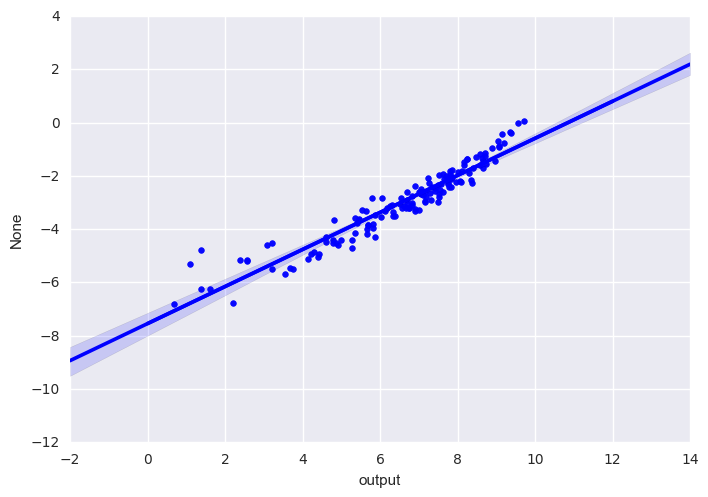

In [66]:
sns.regplot(np.log(ps_data['output']),np.log(NC_i), color ='blue')
plt.show()

5) Using your analysis in question 1 above, **propose and construct an estimate of $A_{i}$ for each firm**. Plot a **histogram** of these estimates. Discuss the **measured productivity differences across the utilities** in your sample. Can you think of any policy implications of your findings?

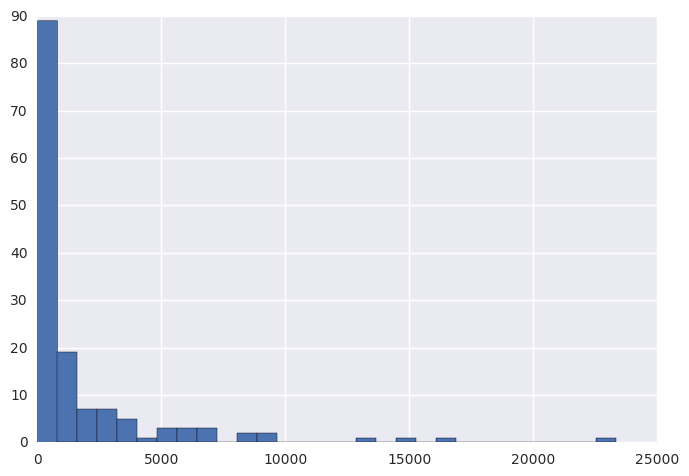

In [69]:
eta = 1 / model_stats.params[2]
#eta = 1 / model_nc.params[1]
A = ps_data['output'] / ps_data['rent'].pow(shares['capital_share'] * eta)\
* ps_data['fuel_price'].pow(shares['fuel_share']*eta)\
* ps_data['wage'].pow(shares['labor_share']*eta)
A_hist = plt.hist(A,29)
plt.show()

Since $y = Ar^{\alpha}w^{\beta}p^{\gamma}$, I thought $A = \frac{y}{r^{\alpha}w^{\beta}p^{\gamma}}$ will be a good way to estimate productivity level. The histogram above is shows the distribution of productivity level. As it can be observed from the histrogram, most firms have very low productivity level. I believe this shows the characteristics of the electricity industry. Since electricity production level is usually not decided by generating maximum profit for the firms, but rather decided by the government, firms that are in the electricity industry do not have as much motivation to improve their productivity levels.

6) ~~**Compute the least squares fit of the logs of output onto those of capital, labor and fuel**. **Construct a table summarizing your results and briefly describe them in a few paragraphs**. Relate your least squares coefficient estimates to the **Cobb-Douglas production function parameters** as well as your analysis in questions 1 and 2 above.~~

### Different trials... (Not part of the homework)

In [ ]:
# Linear Regression Fit (sklearn)
model = lm.fit(X,Y)
constant = pd.DataFrame({'Predictors': ['Constant'], 'Coefficients': [model.intercept_]})
coef = pd.DataFrame(list(zip(predictors, model.coef_)), columns = ['Predictors', 'Coefficients'])
lm_table = pd.concat([constant, coef], ignore_index=True)
lm_table = lm_table.reindex_axis(coef.columns, axis=1)
print("R-squared value is %s" %lm.score(X,Y))
print("Linear regression coefficients of log(electricity cost):")
lm_table

In [ ]:
class LinearRegression(linear_model.LinearRegression):
    """
    Modification on LinearRegression function in linear_model to calculate standard error and p values.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        self.sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        self.se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

In [ ]:
# Linear Regression Fit (Matrix computation)
pr = ols_data.columns[1:]
Xm = np.mat(ols_data[pr])
Ym = np.mat(Y).T
beta_hat = ((Xm.T*Xm).I)*Xm.T*Ym
# beta_hat
pd.DataFrame(data=beta_hat, index=pr, columns=['Coefficients'])

In [ ]:
res = Ym - Xm * beta_hat
rss = res.T*res
print("Residual Sum of Squares: %s" %float(rss))

In [ ]:
(Ym - model.predict(X))-res

In [ ]:
mse = rss / (len(ols_data) - 3)
print("Mean Squared Error: %s" %float(mse))

In [ ]:
hat_mat = Xm*(Xm.T*Xm).I*Xm.T
cov_mat = pd.DataFrame(data=float(mse)*(Xm.T*Xm).I, index = pr)
cov_mat.columns = [pr]
#Covariance matrix of beta_hat
cov_mat
#se = np.sqrt(np.diag(cov_mat))
#se

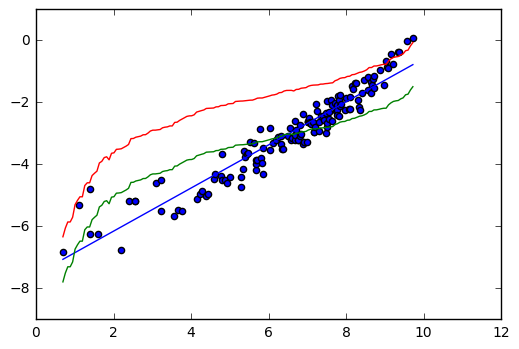

In [36]:
plt.scatter(np.log(ps_data['output']),np.log(NC_i))
x_pred = np.linspace(np.log(ps_data['output']).min(), np.log(ps_data['output']).max(), 145)
y_pred = model_nc.predict(sm.add_constant(x_pred))
plt.plot(x_pred, y_pred)
prstd, iv_l, iv_u = wls_prediction_std(model_nc, alpha = 0.1)
plt.plot(x_pred, iv_l)
plt.plot(x_pred, iv_u)
plt.show()